## Non-negative least squares

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Generating Random Data

In [2]:
np.random.seed(42)
n_samples,n_features = 200,50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)
y += 5 * np.random.normal(size=(n_samples,))

### Split Dataset

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5)

### Fit the Non-Negative least squares.

In [4]:
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196526


### Fit an OLS.

In [5]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7436926291700351


### Plot

Text(0, 0.5, 'NNLS regression coefficients')

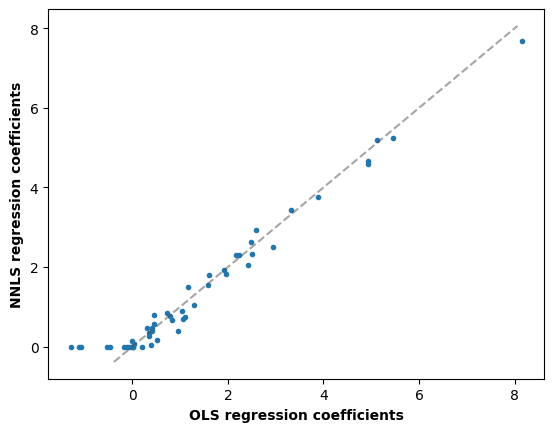

In [6]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

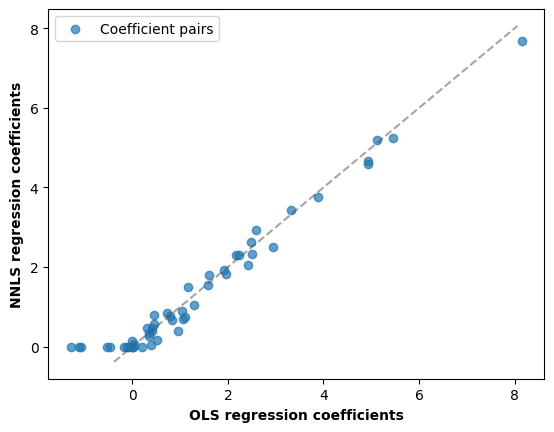

In [7]:
fig, ax = plt.subplots()

# Replace this:
# ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

# With this:
ax.scatter(reg_ols.coef_, reg_nnls.coef_, color="tab:blue", alpha=0.7, label="Coefficient pairs")

# Diagonal reference line
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)

# Axis labels
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

# Optional: add legend
ax.legend()

plt.show()
